In [7]:
import coin
import importlib
import pandas as pd
import logging
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import traceback

In [2]:
logging.basicConfig(
    format="[%(levelname)s]%(asctime)s %(message)s", 
    datefmt="%Y-%m-%d %H:%M:%S",
    filename="coin.log",
    level=logging.DEBUG
)

In [40]:
n_sample = int(1e3)
z = 3
s1 = 0.1

In [41]:
importlib.reload(coin)
try:
    samples, lls, proposed = coin.run(
        n_sample,
        z,
        s1,
        coin.Normal.Param(0, 0),
        coin.Normal
    )
except coin.McmcException as e:
    samples, lls, proposed = e.ret
    traceback.print_exec()

100-th step begins: 0.2752227783203125
200-th step begins: 0.463486909866333
300-th step begins: 0.7253696918487549
400-th step begins: 0.9088146686553955
500-th step begins: 1.2077298164367676
600-th step begins: 1.4056367874145508
700-th step begins: 1.6440787315368652
800-th step begins: 1.9145138263702393
900-th step begins: 2.1312246322631836
1000-th step begins: 2.3851137161254883


In [42]:
df = pd.DataFrame(dict(
    x = [p.x for p in samples],
    y = [p.y for p in samples],
    lls = lls
))
df.tail(1)

,x,y,lls
999,1.738679,1.174975,-3.028799


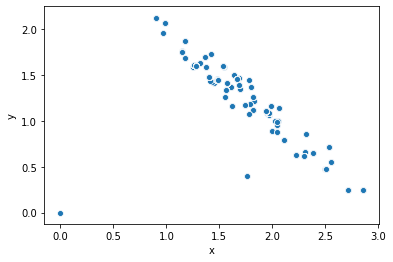

In [43]:
sns.scatterplot(df.x, df.y)

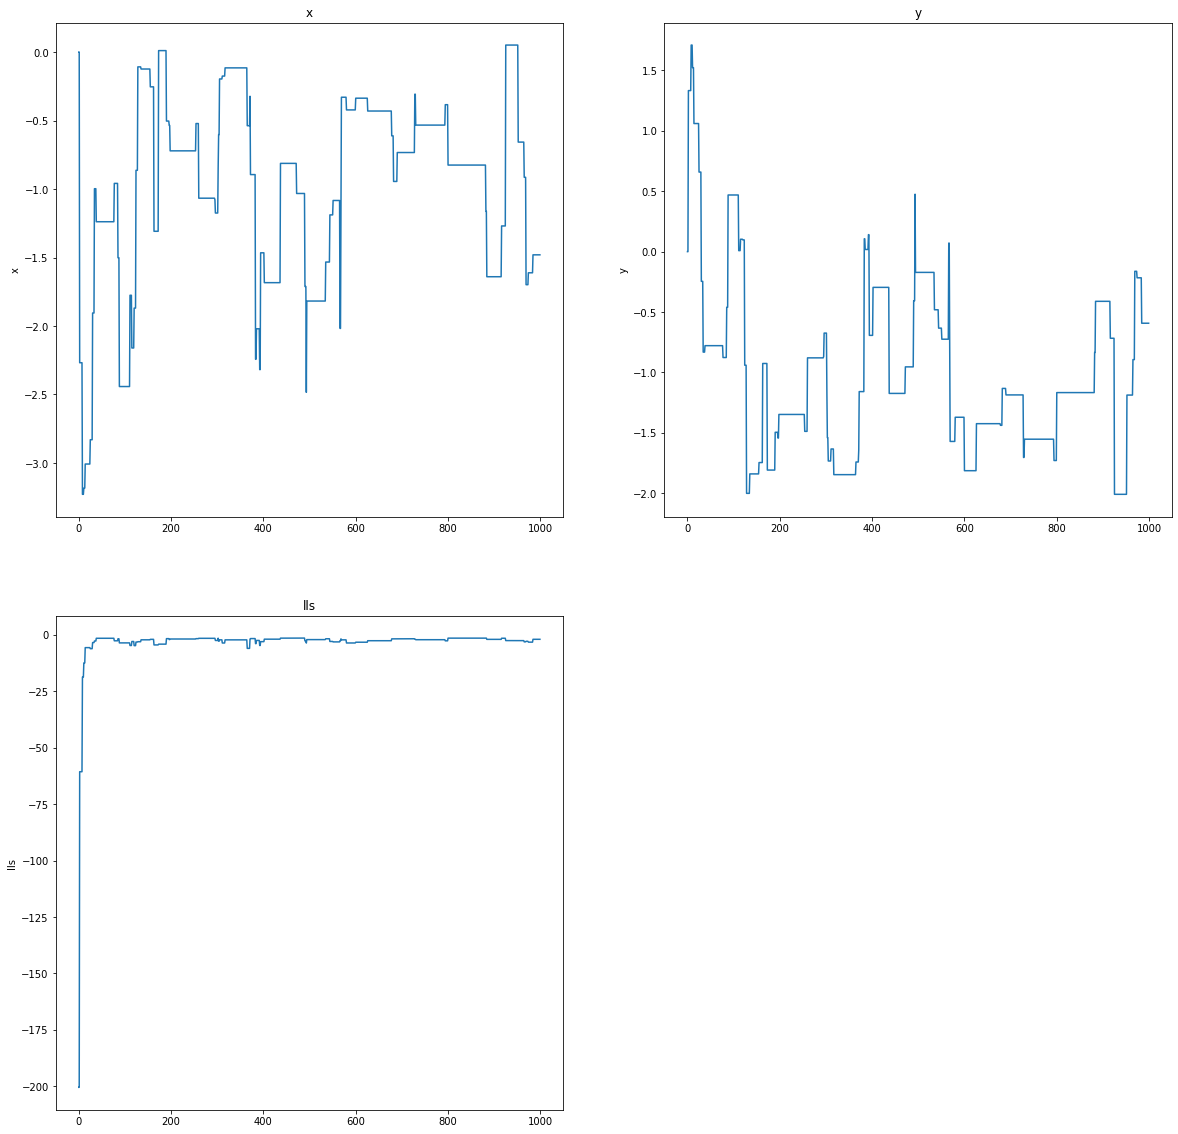

In [35]:
fig = plt.figure(figsize=(20,20))
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(2, 2, i+1)
    sns.lineplot(range(len(df)), df[c])
    ax.set_title(c)